Attempt to pass the read screen through Resnet.

In [1]:
# just to find screen limits
screenXY = []

import pyautogui as py
import time
for i in range(0, 2):
    print("position", i+1)
    time.sleep(3)
    screenXY.append(py.position())
x1,y1 = screenXY[0]
x2,y2 = screenXY[1]
print(x1,y1,x2,y2)

position 1
position 2
475 445 1019 911


In [19]:
import numpy as np
import d3dshot
import cv2
from time import time


def screen_record_d3dshot_play_original():
    screen_buffer = d3dshot.create(
        capture_output="numpy")
    screen_buffer.display = screen_buffer.displays[0]
    start_time = time()
    while (True):
        printscreen = screen_buffer.screenshot(region=(x1, y1, x2, y2))
        grey = cv2.GaussianBlur(printscreen, (5, 5), 0)
        canny = cv2.Canny(grey, threshold1=50, threshold2=100)
        enhanced = cv2.equalizeHist(canny)
        cv2.imshow('window', cv2.cvtColor(enhanced, cv2.COLOR_BGR2RGB))
        if cv2.waitKey(1) & 0xFF == ord('q'):
            cv2.destroyAllWindows()
            break
    end_time = time()
    cv2.destroyAllWindows()
    screen_buffer.stop()
    print(screen_buffer.displays)
    return (end_time - start_time)


In [18]:
screen_record_d3dshot_play_original()

Only 1 instance of D3DShot is allowed per process! Returning the existing instance...


NameError: name 'x' is not defined

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
random_flip_1 (RandomFlip)      (None, 128, 128, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
train_rotation (RandomRotation) (None, 128, 128, 3)  0           random_flip_1[0][0]              
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 128, 128, 3)  0           train_rotation[0][0]             
____________________________________________________________________________________________

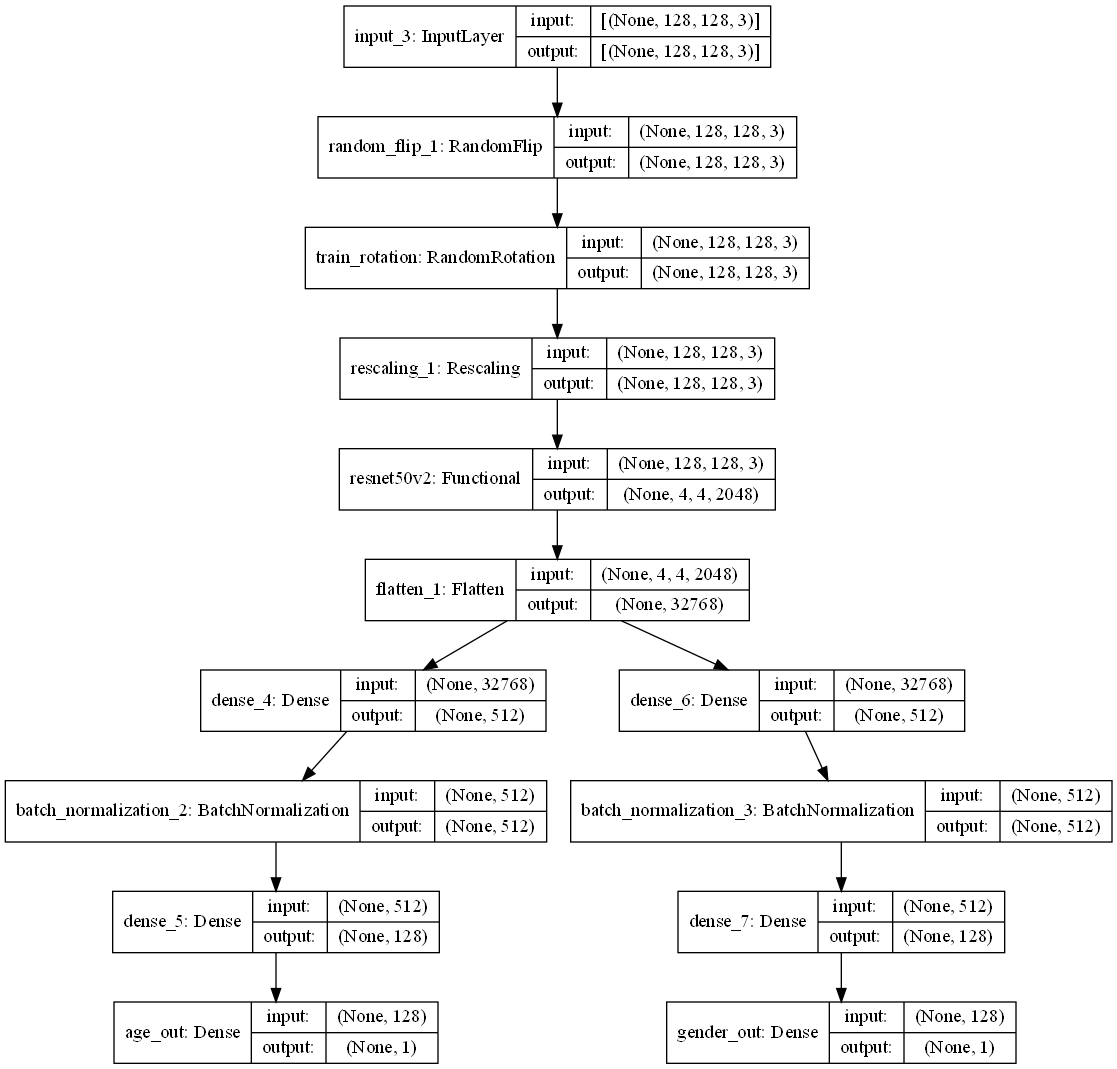

In [3]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2D, Flatten, Dense, Concatenate, Rescaling, BatchNormalization, Dropout, RandomRotation, RandomTranslation, RandomFlip, RandomCrop, Activation, GlobalAveragePooling2D, GaussianNoise, GlobalMaxPooling2D, Resizing
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.regularizers import l1_l2, l1, l2
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.applications.vgg16 import VGG16

input = Input(shape=(128, 128, 3))
flip = RandomFlip(mode="horizontal")(input)
rot = RandomRotation((-0.05, 0.05), interpolation="bilinear",
                     name="train_rotation", fill_mode="nearest")(flip)
scale = Rescaling(2, -1)(rot)

pre_model = ResNet50V2(input_shape=(128, 128, 3),
                       include_top=Fase, weights='imagenet')
pre_model.trainable = False
pre_out = pre_model(scale)

flat = Flatten()(pre_out)

age = Dense(512, activation='relu')(flat)
age = BatchNormalization()(age)
age = Dense(128, activation='relu')(age)
# age = BatchNormalization()(age)
# age = Dense(32, activation='relu')(age)
# age = BatchNormalization()(age)
age = Dense(1, activation='relu', name="age_out")(age)


gender = Dense(512, activation='relu')(flat)
gender = BatchNormalization()(gender)
gender = Dense(128, activation='relu')(gender)
# gender = BatchNormalization()(gender)
# gender = Dense(32, activation='relu')(gender)
# gender = BatchNormalization()(gender)
gender = Dense(1, activation='sigmoid', name="gender_out")(gender)


modelB = Model(input, [age, gender])


modelB.summary()

plot_model(modelB, show_shapes=True)


In [2]:
# just to find screen limits
screenXY = []

import pyautogui as py
import time
for i in range(0, 2):
    print("position", i+1)
    time.sleep(3)
    screenXY.append(py.position())
x1,y1 = screenXY[0]
x2,y2 = screenXY[1]
width = x2-x1
height = y2-y1
print(x1,y1,x2,y2, width, height)

position 1
position 2
467 429 1021 910 554 481


In [3]:
import numpy as np
import d3dshot
import cv2
from time import time


def startd3d():
    screen_buffer = d3dshot.create(capture_output="numpy")
    screen_buffer.display = screen_buffer.displays[0]
    return screen_buffer

def screenshotd3d(screen_buffer):
    printscreen = screen_buffer.screenshot(region=(x1, y1, x2, y2))
    return printscreen

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 481, 554, 3)]     0         
_________________________________________________________________
resizing (Resizing)          (None, 224, 224, 3)       0         
_________________________________________________________________
tf.__operators__.getitem (Sl (None, 224, 224, 3)       0         
_________________________________________________________________
tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)       0         
_________________________________________________________________
resnet50v2 (Functional)      (None, 1000)              25613800  
Total params: 25,613,800
Trainable params: 25,568,360
Non-trainable params: 45,440
_________________________________________________________________


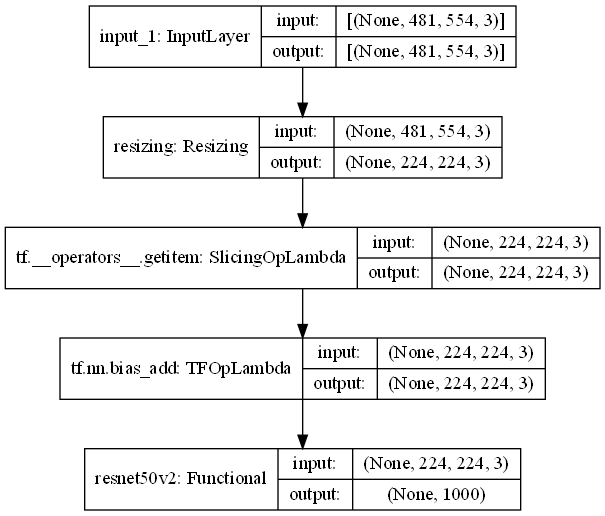

In [4]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.layers import Reshape, Resizing
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2D, Flatten, Dense, Concatenate, Rescaling, BatchNormalization, Dropout, RandomRotation, RandomTranslation, RandomFlip, RandomCrop, Activation, GlobalAveragePooling2D, GaussianNoise, GlobalMaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.regularizers import l1_l2, l1, l2
from tensorflow.keras.applications.resnet_v2 import ResNet50V2

input = Input(shape=(height, width,3))
sized = Resizing(224,224)(input)
rescale = preprocess_input(sized)
pre_model = ResNet50V2(input_shape=(224, 224, 3),
                       include_top=True, weights='imagenet')
result = pre_model(rescale)

model = Model(input, result)


model.summary()

plot_model(model, show_shapes=True)

In [20]:
from tensorflow.keras.layers import Reshape
from tensorflow.keras.applications.resnet_v2 import decode_predictions
buffer = startd3d()
image = screenshotd3d(buffer)
while (True):
    cv2.imshow('window', cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if cv2.waitKey(1) & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        break
image = np.expand_dims(image, axis=0)

Only 1 instance of D3DShot is allowed per process! Returning the existing instance...


In [21]:
#reshape = Reshape(image, [-1, width, height, 3])
result = model.predict(image)
decoded = decode_predictions(result, top=10)
print(decoded)

[[('n02089973', 'English_foxhound', 1.0), ('n02356798', 'fox_squirrel', 3.6351916e-13), ('n15075141', 'toilet_tissue', 0.0), ('n02321529', 'sea_cucumber', 0.0), ('n02395406', 'hog', 0.0), ('n02391049', 'zebra', 0.0), ('n02389026', 'sorrel', 0.0), ('n02364673', 'guinea_pig', 0.0), ('n02363005', 'beaver', 0.0), ('n02361337', 'marmot', 0.0)]]
